# X90 Optimiser

This notebook is purely for the purpose of optimising the X90 pulse for a given transmon

In [1]:
# imports
import numpy as np
from qutip import basis
from transmon_code.transmon import *
from transmon_code.optimise_X90 import *
from transmon_code.simulate import *

In [12]:
# define the transmon

tr = Transmon(n_levels=8, initial_state=0, Ω=5000, α=-100, RWA=False, dt=1/10000)

tr.X90_args = {'A': 7.401247702099688, 'Γ': 0.5, 'ω': 4997.7656106597815, 'A_DRAG': 0.08678794179697293}
tr.X90_args = {'A': 87.29585239045917, 'Γ': 0.05, 'ω': 4992.597209385877, 'A_DRAG': 0}

Optimising A
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 


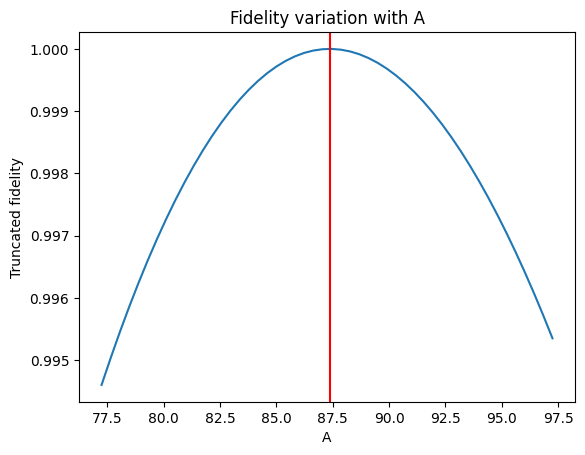

Optimising ω
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 


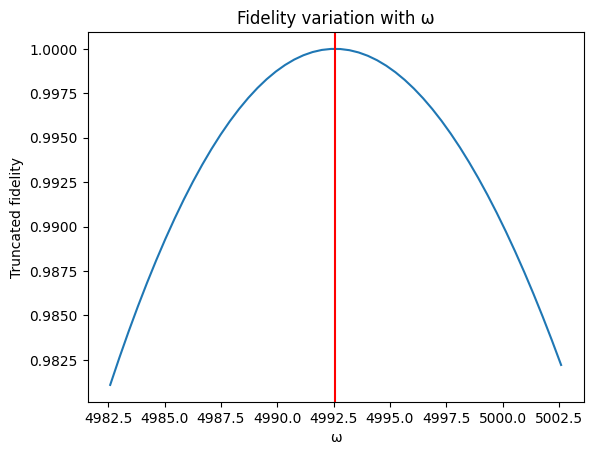

Keeping Γ constant.
Optimising A_DRAG
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 


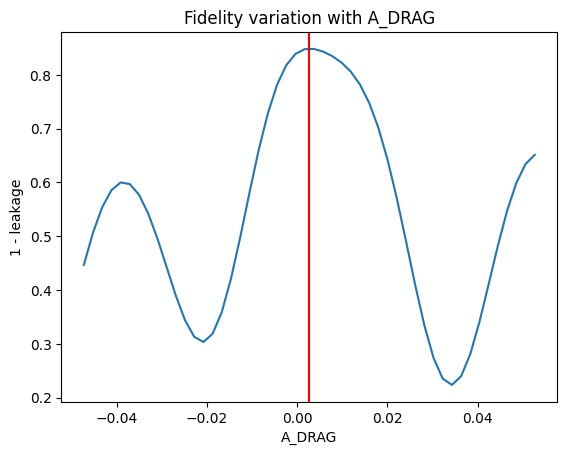

Optimal args:{'A': 87.36499056752308, 'Γ': 0.05, 'ω': 4992.55670982872, 'A_DRAG': 0.002689717710147287}


In [21]:
# optimise the pulse

t = np.arange(0, tr.X90_args["Γ"], tr.dt)
semiranges = {"A":10, "ω":10, "Γ":0, "A_DRAG":0.05}

tr.X90_args = create_X90_pulse(t, tr, args=tr.X90_args, semiranges=semiranges, plot=True, rand_init=False, N=50)

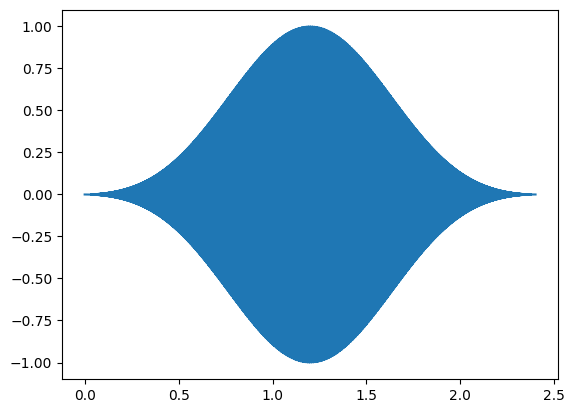

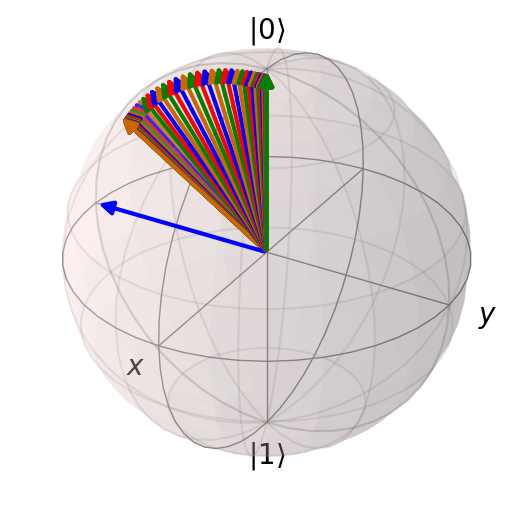

Fidelity (f):                0.9260594652204475
Measured error (1-f):        0.07394053477955254

Leakage error:               0.0002460275309578549
Theoretical coherence error: 0.0
Error accounted for:         0.0002460275309578549

Error unaccounted for:       0.07369450724859468


In [24]:
# check result
# %matplotlib qt

# test from 0 to - (minus)
targ = (basis(tr.n_levels, 0)-1j*basis(tr.n_levels, 1)).unit()

res, f = simulate(tr, tr.X90_args, target=targ, noise=False, plot=True)

break_down_errors(tr, tr.X90_args, res[-1], f)

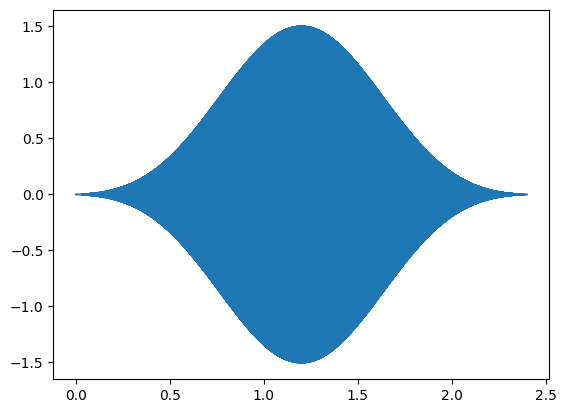

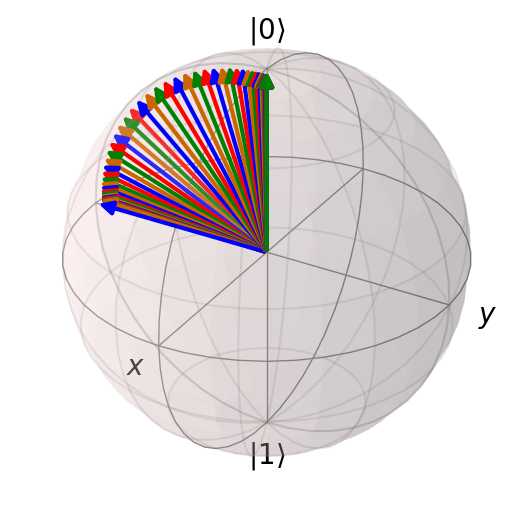

Fidelity (f):                0.9922068926922815
Measured error (1-f):        0.007793107307718539

Leakage error:               0.0026935223867823564
Theoretical coherence error: 0.011558610338056422
Error accounted for:         0.014252132724838778

Error unaccounted for:       -0.00645902541712024


In [25]:
tr = Transmon(8, 0, 2*np.pi*2981, 2*np.pi*-199, 0.00001, 106, 101, False)

tr.X90_args = {'A': 1.5, 'Γ': 2.4, 'ω': tr.Ω, 'A_DRAG': 0}

t = np.arange(0, tr.X90_args["Γ"], tr.dt)

targ = (basis(8,0)-1j*basis(8,1)).unit()

r, f = simulate(tr, tr.X90_args, t, targ, plot=True)

break_down_errors(tr, tr.X90_args, r[-1], f)